# Guia 1
## Ejercicio 1
Escriba funciones que permitan generar las siguientes señales discretas:
1. Una senoidal que responda a la ecuación $y[n] = sen(2*\pi*f_s*t+\Phi)$, donde t es la variable de tiempo discreto, con paso $\frac{1}{f_m}$, `f_m` es la frecuencia de muestre perteneciente a los reales, $f_s$ es la frecuencia de la senoidal y $\phi$ su fase.
2. Una señal sync, definida como
$$sinc(x) = 
    \begin{cases}
        \frac{sin(x)}{x}    &\quad\text{si } x \neq 0 \\
        1                   &\quad\text{si } x = 0 \\
    \end{cases}$$
considerando $x = 2\pi f_st$, con $f_s \in \Reals$ y $t \in (-1,1)$
3. Una onda cuadrada, que puede definirse de la siguiente manera
$c(t) = -1$ si $mod(2*\pi*f_s*t + \Phi, 2*\pi) >= \pi$
$c(t) = 1$ si $mod(2*\pi*f_s*t + \Phi, 2*\pi) < \pi$

Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde $t_inicial$ a $t_final$. Una vez generadas estas funciones, pruebelas utilizando una frecuencia de meustre de 100Hz, un intervalo de tiempo [0,1] y distintos valores para la $f_s$, y la fase $\Phi$. Respete la relacion $2*f_s <= f_m$ para determinar los valores de las frecuencias.


In [5]:
import numpy as np

''' Ejercicio 1.1
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def senoidal(tini, tfin, fm, fs, fase):
    # periodo
    T = 1.0/fm
    # muestras
    t = np.arange(tini,tfin,T)
    # valores
    return [t, np.sin(2*np.pi*fs*t+fase)]

''' Ejercicio 1.2
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def sinc(tini, tfin, fm, fs):
    T = 1.0/fm
    t = np.arange(tini,tfin,T)
    s = [0]*len(t)
    aux = 2*np.pi*fs
    for i in range(len(t)):
        s[i] = 1 if t[i] == 0 else np.sin(aux*t[i])/aux*t[i]
    return [t,s]

''' Ejercicio 1.3
tini: t inicial
tfin: t final
fm: frecuencia muestral
fs: frecuencia de la senial
fase: fase
'''
def cuadrada(tini, tfin, fm, fs, fase):
    T = 1.0/fm
    t = np.arange(tini, tfin, T)
    s = [0]*len(t)
    dospi = 2*np.pi
    aux = dospi*fs
    for i in range(len(t)):
        s[i] = -1 if np.mod(aux*t[i]+fase, dospi) >= np.pi else 1
    return [t,s]

### Test

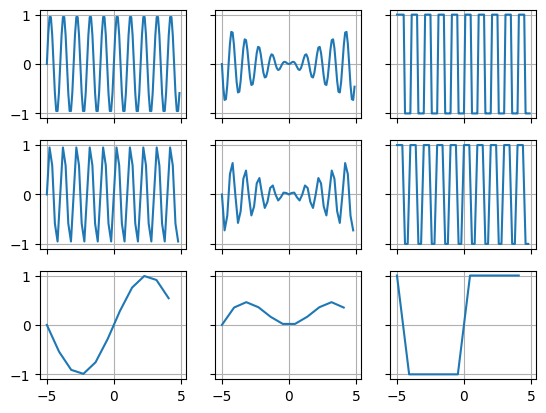

In [9]:
import matplotlib.pyplot as plt

[t00,s00] = senoidal(-5,5,10,1,0)
[t01,s01] = senoidal(-5,5,5,1,0)
[t02,s02] = senoidal(-5,5,1.1,1,0)

[t10,s10] = sinc(-5,5,10,1)
[t11,s11] = sinc(-5,5,5,1)
[t12,s12] = sinc(-5,5,1.1,1)

[t20,s20] = cuadrada(-5,5,10,1,0)
[t21,s21] = cuadrada(-5,5,5,1,0)
[t22,s22] = cuadrada(-5,5,1.1,1,0)

fig,ax = plt.subplots(3,3,sharex=True,sharey=True)
ax[0,0].grid()
ax[1,0].grid()
ax[2,0].grid()
ax[0,1].grid()
ax[1,1].grid()
ax[2,1].grid()
ax[0,2].grid()
ax[1,2].grid()
ax[2,2].grid()

ax[0,0].plot(t00,s00)
ax[1,0].plot(t01,s01)
ax[2,0].plot(t02,s02)
ax[0,1].plot(t10,s10)
ax[1,1].plot(t11,s11)
ax[2,1].plot(t12,s12)
ax[0,2].plot(t20,s20)
ax[1,2].plot(t21,s21)
ax[2,2].plot(t22,s22)

plt.show()